# Correlation between life expectancy and fertility globally 1960-2015

### Loading data and cleaning up data

In [1]:
#importing data frames 
import pandas as pd
fert=pd.read_csv("gapminder_total_fertility.csv", index_col=0)
life=pd.read_excel("gapminder_lifeexpectancy.xlsx", index_col=0)
pop=pd.read_excel('gapminder_population.xlsx', index_col=0)
cont=pd.read_csv('continents.csv', sep=';')

In [2]:
#check each df dimensions 
print('life df: ' + str(life.shape))
print('fert df: ' + str(fert.shape))
print('pop df: ' + str(pop.shape))
print('cont df: ' + str(cont.shape))

life df: (260, 217)
fert df: (260, 216)
pop df: (275, 81)
cont df: (194, 2)


In [3]:
#verify that column names are integers and strings 
print('life columns: ' + str(life.columns))
print('fert columns: ' + str(fert.columns))
print('pop columns: ' + str(pop.columns))
print('cont columns: ' + str(cont.columns))

life columns: Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)
fert columns: Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)
pop columns: Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008

In [4]:
#change fert column names from string to integer
colNames=[int(x) for x in fert.columns]
fert.set_axis(axis=1, labels=colNames, inplace=True)
#verify fert column names are now integers
print('fert columns: ' + str(fert.columns))

fert columns: Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)


In [5]:
#set country column to index in cont df for later on 
cont=cont.set_index('country')

In [6]:
#slicing 1960-2015 columns in all 3 dfs
targetCols=list(map(int, range(1960, 2016)))
fert2=fert[targetCols]
life2=life[targetCols]
pop2=pop[targetCols]
#verify new dfs dimensions 
print('life df: ' + str(life2.shape))
print('fert df: ' + str(fert2.shape))
print('pop df: ' + str(pop2.shape))

life df: (260, 56)
fert df: (260, 56)
pop df: (275, 56)


### Merging fertility, population and life expectancy together via stack and unstack 

In [7]:
#folding the year columns towards the country index for each df
sfert2=fert2.stack()
slife2=life2.stack()
spop2=pop2.stack()

In [8]:
#create dictionary for merging the 3 dfs into 1 large one 
d={'fertility':sfert2, 'lifeExp':slife2, 'population':spop2} 
#create a large df from the 3 smaller ones where country and year are indices 
df1=pd.DataFrame(data=d)
#fold the df again into a series. country, year and category(fertility, lifeExp, population) are indices
df2=df1.stack()

Text(7.16, 53.11, 'Zimbabwe')

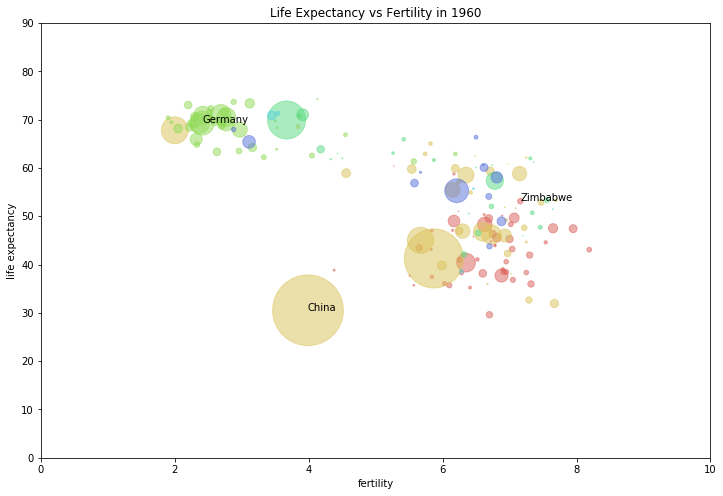

In [31]:
#testing method 1, cant figure out legend
import pylab as plt
df3=df2.unstack(1)
    ##slice the individual year from main df 
df3=df3[1960]
    ##unfold the df further by pulling category from indices
df3=df3.unstack(1)
    ##normalize population column 
df3['popNorm']=((df3['population']-df3['population'].min())/
                    (df3['population'].max()-df3['population'].min()))*5000
df4=pd.merge(cont, df3, left_index=True, right_index=True)
    ##create a color map for plot
colLab=df4['continent'].unique()
colVal=sns.color_palette('hls', 8)
colMap=dict(zip(colLab, colVal))
    ##building plot and adding 
df4.plot.scatter('fertility', 'lifeExp', s=df4['popNorm'], alpha=0.5, figsize=(12,8), c=df4['continent'].map(colMap))

plt.title('Life Expectancy vs Fertility in ' + str(1960))
plt.ylabel('life expectancy')
plt.axis([0,10,0,90])
    ##add labels of 3 semi randomly chosen countries to scatter
plt.annotate('China', (df4.loc['China']['fertility'], df4.loc['China']['lifeExp']))
plt.annotate('Germany', (df4.loc['Germany']['fertility'], df4.loc['Germany']['lifeExp']))
plt.annotate('Zimbabwe', (df4.loc['Zimbabwe']['fertility'], df4.loc['Zimbabwe']['lifeExp']))

Text(7.16, 53.11, 'Zimbabwe')

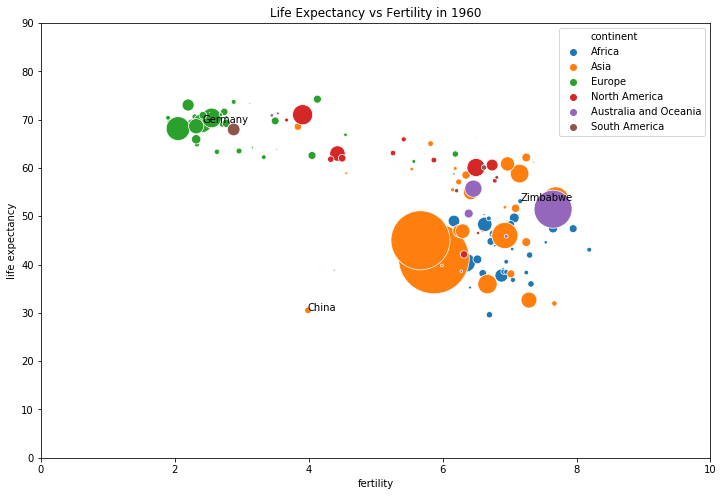

In [30]:
#testing method 2 with seaborn, points not right size 
import pylab as plt
import seaborn as sns
df3=df2.unstack(1)
    ##slice the individual year from main df 
df3=df3[1960]
    ##unfold the df further by pulling category from indices
df3=df3.unstack(1)
    ##normalize population column 
df3['popNorm']=((df3['population']-df3['population'].min())/
                    (df3['population'].max()-df3['population'].min()))*5000
df4=pd.merge(cont, df3, left_index=True, right_index=True)
    ##create a color map for plot
plt.figure(figsize=(12,8))
sns.scatterplot('fertility', 'lifeExp', hue='continent', data=df4, s=df4['popNorm'])
plt.title('Life Expectancy vs Fertility in ' + str(1960))
plt.ylabel('life expectancy')
plt.axis([0,10,0,90])
    ##add labels of 3 semi randomly chosen countries to scatter
plt.annotate('China', (df4.loc['China']['fertility'], df4.loc['China']['lifeExp']))
plt.annotate('Germany', (df4.loc['Germany']['fertility'], df4.loc['Germany']['lifeExp']))
plt.annotate('Zimbabwe', (df4.loc['Zimbabwe']['fertility'], df4.loc['Zimbabwe']['lifeExp']))